In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'statsmodels'

In [205]:
!pip install statsmodels

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 2.8 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation 

In [206]:
import statsmodels.api as sm

In [97]:
!pip install fbprophet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [114]:
from fbprophet import Prophet

In [115]:
df = pd.read_csv('data/squirrel.csv')
rf = pd.read_csv('data/rainfall.csv')
rsquir = pd.DataFrame(df[df['species'] == 'Sciurus vulgaris' ])

In [116]:
rsquir['year_parsed'] = pd.to_datetime(rsquir['year'], format = '%Y')


In [117]:
rsquir2 = pd.DataFrame(rsquir.groupby('year_parsed')['individualCount'].sum())
rsquir = rsquir[rsquir["year_parsed"].dt.year >= 1980]
rsquir = rsquir[rsquir["year_parsed"].dt.year < 2021]

In [118]:
rsquir['year_parsed'] = rsquir['year_parsed'].dt.strftime('%Y')

In [119]:
df = pd.DataFrame(rsquir.groupby('year')["individualCount"].sum())
df.reset_index()

,year,individualCount
0,1980,55.0
1,1981,49.0
2,1982,21.0
3,1983,14.0
4,1984,10.0
5,1985,24.0
6,1986,14.0
7,1987,17.0
8,1988,22.0
9,1989,18.0


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'No. of Red Squirrels observed')]

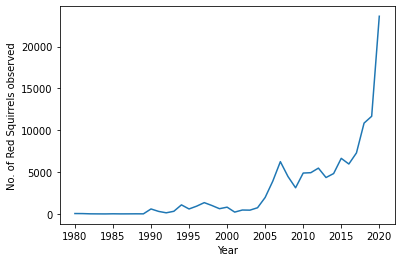

In [120]:
ax = sns.lineplot(x = "year", y = "individualCount", data=df)
ax.set(xlabel = "Year", ylabel="No. of Red Squirrels observed")

In [121]:
df.head()
df.reset_index(inplace = True)

In [122]:
df = df.rename(columns={"year": "ds", "individualCount":"y"})

In [123]:
df.dtypes

ds      int64
y     float64
dtype: object

In [124]:
df['ds'] = pd.to_datetime(df['ds'], format = '%Y')

In [125]:
df['ds'] = df['ds'].dt.strftime('%Y')

In [126]:
df.head()

,ds,y
0,1980,55.0
1,1981,49.0
2,1982,21.0
3,1983,14.0
4,1984,10.0


In [127]:
df['ds'].dtypes

dtype('O')

In [132]:
rf.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,win,spr,sum,aut,ann
0,1836,163.7,95.9,146.2,92.0,16.6,87.7,150.4,89.1,157.7,156.6,169.7,178.6,---,254.8,327.2,484.0,1504.1
1,1837,68.1,136.5,49.3,69.7,51.1,74.5,120.6,104.2,79.5,128.8,136.1,117.0,383.2,170.1,299.2,344.4,1135.3
2,1838,49.0,45.3,105.7,71.6,63.8,155.8,114.8,129.7,99.6,113.5,119.0,105.4,211.3,241.1,400.3,332.1,1173.3
3,1839,113.8,90.5,112.0,39.5,57.4,72.0,87.7,85.8,186.8,125.3,97.9,129.9,309.8,208.9,245.5,410.0,1198.7
4,1840,169.9,77.1,23.4,32.7,105.3,95.6,101.5,93.7,149.8,101.5,110.6,71.2,376.9,161.4,290.8,361.9,1132.3


In [133]:
rfann = pd.DataFrame(rf[rf["year"] >= 1980])

In [139]:
rfann = rfann.drop("jan", axis=1)
rfann = rfann.drop("feb", axis=1)
rfann = rfann.drop("mar", axis=1)
rfann = rfann.drop("apr", axis=1)
rfann = rfann.drop("may", axis=1)
rfann = rfann.drop("jun", axis=1)
rfann = rfann.drop("jul", axis=1)
rfann = rfann.drop("aug", axis=1)
rfann = rfann.drop("sep", axis=1)
rfann = rfann.drop("oct", axis=1)
rfann = rfann.drop("nov", axis=1)
rfann = rfann.drop("dec", axis=1)

In [140]:
rfann.head()

,year,win,spr,sum,aut,ann
144,1980,401.9,150.1,389.1,549.8,1519.2
145,1981,489.4,260.7,242.2,679.5,1528.7
146,1982,342.2,297.5,268.5,610.6,1646.9
147,1983,508.2,322.7,174.8,468.7,1495.3
148,1984,553.7,187.3,170.9,607.4,1456.3


In [141]:
rfann['year'] = pd.to_datetime(rfann['year'], format = '%Y')

In [142]:
rfann['year'] = rfann['year'].dt.strftime('%Y')

In [143]:
rfann.head()

,year,win,spr,sum,aut,ann
144,1980,401.9,150.1,389.1,549.8,1519.2
145,1981,489.4,260.7,242.2,679.5,1528.7
146,1982,342.2,297.5,268.5,610.6,1646.9
147,1983,508.2,322.7,174.8,468.7,1495.3
148,1984,553.7,187.3,170.9,607.4,1456.3


In [149]:
rfann = rfann.rename(columns={"year": "ds"})

In [150]:
rfann.dtypes

ds      object
win     object
spr    float64
sum    float64
aut    float64
ann    float64
dtype: object

In [151]:
df2 = df.merge(rfann, on = "ds", how="right")

In [152]:
df2.head()

,ds,y,ann_x,win,spr,sum,aut,ann_y
0,1980,55.0,NaN,401.9,150.1,389.1,549.8,1519.2
1,1981,49.0,NaN,489.4,260.7,242.2,679.5,1528.7
2,1982,21.0,NaN,342.2,297.5,268.5,610.6,1646.9
3,1983,14.0,NaN,508.2,322.7,174.8,468.7,1495.3
4,1984,10.0,NaN,553.7,187.3,170.9,607.4,1456.3


In [241]:
df2 = df2.drop('ann_x', axis=1)

In [242]:
df2.dropna(how="all")

,ds,y,win,spr,sum,aut,ann_y
0,1980,55.0,401.9,150.1,389.1,549.8,1519.2
1,1981,49.0,489.4,260.7,242.2,679.5,1528.7
2,1982,21.0,342.2,297.5,268.5,610.6,1646.9
3,1983,14.0,508.2,322.7,174.8,468.7,1495.3
4,1984,10.0,553.7,187.3,170.9,607.4,1456.3
5,1985,24.0,296.1,282.2,478.8,418.7,1503.5
6,1986,14.0,404.6,427.8,269.0,450.3,1636.7
7,1987,17.0,437.4,298.3,327.5,423.5,1350.8
8,1988,22.0,473.1,303.9,396.8,413.5,1593.5
9,1989,18.0,583.8,306.3,311.7,338.8,1489.3


In [252]:
df2 = df2.dropna(axis = 0)
df2

,ds,y,win,spr,sum,aut,ann_y
0,1980,55.0,401.9,150.1,389.1,549.8,1519.2
1,1981,49.0,489.4,260.7,242.2,679.5,1528.7
2,1982,21.0,342.2,297.5,268.5,610.6,1646.9
3,1983,14.0,508.2,322.7,174.8,468.7,1495.3
4,1984,10.0,553.7,187.3,170.9,607.4,1456.3
5,1985,24.0,296.1,282.2,478.8,418.7,1503.5
6,1986,14.0,404.6,427.8,269.0,450.3,1636.7
7,1987,17.0,437.4,298.3,327.5,423.5,1350.8
8,1988,22.0,473.1,303.9,396.8,413.5,1593.5
9,1989,18.0,583.8,306.3,311.7,338.8,1489.3


# Prophet model

In [253]:
m = Prophet()

In [254]:
#m.add_regressor('ann_y')

In [255]:
m.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -55.5658
Iteration  1. Log joint probability =    18.4441. Improved by 74.0099.
Iteration  2. Log joint probability =    31.9037. Improved by 13.4597.
Iteration  3. Log joint probability =    55.8443. Improved by 23.9405.
Iteration  4. Log joint probability =    64.9095. Improved by 9.06527.
Iteration  5. Log joint probability =    65.0435. Improved by 0.133999.
Iteration  6. Log joint probability =    65.3082. Improved by 0.264653.
Iteration  7. Log joint probability =    65.4226. Improved by 0.11442.
Iteration  8. Log joint probability =    65.4398. Improved by 0.0171645.
Iteration  9. Log joint probability =     65.494. Improved by 0.0542022.
Iteration 10. Log joint probability =    65.5228. Improved by 0.0288463.
Iteration 11. Log joint probability =    65.5647. Improved by 0.0418883.
Iteration 12. Log joint probability =    65.5818. Improved by 0.017074.
Iteration 13. Log joint probability =    65.5838. Improved by 0.00205035.
Iteration 14. Log joi

.0164636.
Iteration 15. Log joint probability =    65.6085. Improved by 0.00816551.
Iteration 16. Log joint probability =    65.6155. Improved by 0.00700895.
Iteration 17. Log joint probability =    65.6174. Improved by 0.0019609.
Iteration 18. Log joint probability =      65.62. Improved by 0.00258988.
Iteration 19. Log joint probability =    65.6201. Improved by 6.72565e-05.
Iteration 20. Log joint probability =    65.6217. Improved by 0.00161581.
Iteration 21. Log joint probability =    65.6231. Improved by 0.00143063.
Iteration 22. Log joint probability =    65.6253. Improved by 0.00212099.
Iteration 23. Log joint probability =     65.626. Improved by 0.000695541.
Iteration 24. Log joint probability =    65.6272. Improved by 0.00123671.
Iteration 25. Log joint probability =    65.6272. Improved by 5.35419e-05.
Iteration 26. Log joint probability =    65.6287. Improved by 0.00143032.
Iteration 27. Log joint probability =    65.6293. Improved by 0.000616339.
Iteration 28. Log joint p

In [256]:
future = m.make_future_dataframe(periods = 20, freq = "YS")

In [257]:
future.head()

,ds
0,1980-01-01
1,1981-01-01
2,1982-01-01
3,1983-01-01
4,1984-01-01


In [258]:
forecast = m.predict(future)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


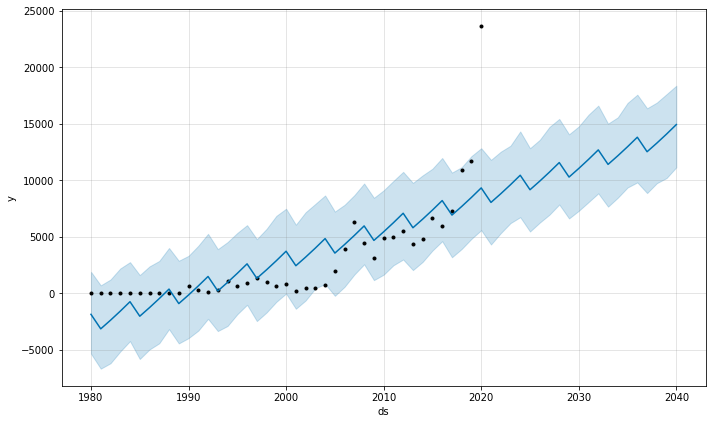

In [259]:
fig1 = m.plot(forecast)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


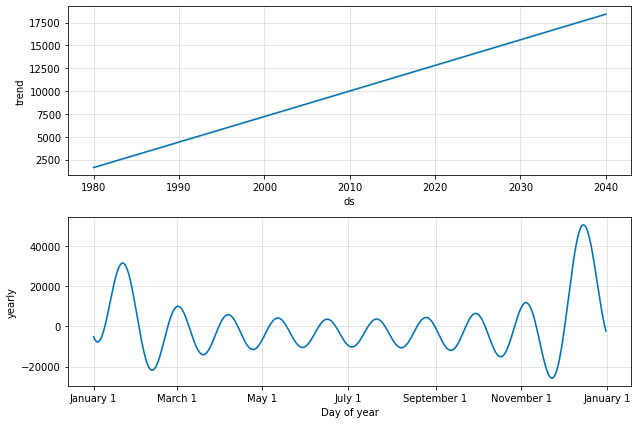

In [260]:
fig2 = m.plot_components(forecast)

In [261]:
nobs = 12
train = df2[:-nobs]
test = df2[-nobs:]

In [262]:
prophet = Prophet()
prophet.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.



Initial log joint probability = -48.8545
Iteration  1. Log joint probability =    10.6514. Improved by 59.5058.
Iteration  2. Log joint probability =    26.1528. Improved by 15.5015.
Iteration  3. Log joint probability =    30.2328. Improved by 4.08.
Iteration  4. Log joint probability =    35.7718. Improved by 5.53892.
Iteration  5. Log joint probability =    35.8341. Improved by 0.0623794.
Iteration  6. Log joint probability =    35.9262. Improved by 0.0920874.
Iteration  7. Log joint probability =     36.023. Improved by 0.0967641.
Iteration  8. Log joint probability =    36.2241. Improved by 0.201128.
Iteration  9. Log joint probability =    36.2549. Improved by 0.0308018.
Iteration 10. Log joint probability =    36.3776. Improved by 0.122729.
Iteration 11. Log joint probability =    36.4318. Improved by 0.0541262.
Iteration 12. Log joint probability =    36.4977. Improved by 0.0659712.
Iteration 13. Log joint probability =    36.5207. Improved by 0.0229925.
Iteration 14. Log join

0552457.
Iteration 15. Log joint probability =    36.6398. Improved by 0.0638364.
Iteration 16. Log joint probability =    36.6744. Improved by 0.0345776.
Iteration 17. Log joint probability =    36.6776. Improved by 0.00322073.
Iteration 18. Log joint probability =    36.6893. Improved by 0.0116638.
Iteration 19. Log joint probability =    36.6979. Improved by 0.00863639.
Iteration 20. Log joint probability =    36.6999. Improved by 0.00194795.
Iteration 21. Log joint probability =    36.7065. Improved by 0.00660282.
Iteration 22. Log joint probability =    36.7098. Improved by 0.0033711.
Iteration 23. Log joint probability =    36.7112. Improved by 0.00133828.
Iteration 24. Log joint probability =    36.7159. Improved by 0.00468199.
Iteration 25. Log joint probability =    36.7159. Improved by 9.03755e-05.
Iteration 26. Log joint probability =    36.7165. Improved by 0.000521334.
Iteration 27. Log joint probability =    36.7172. Improved by 0.000738954.
Iteration 28. Log joint probab

In [263]:
futures = prophet.make_future_dataframe(periods=nobs, freq="YS")

In [264]:
forecast2 = prophet.predict(futures)

/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


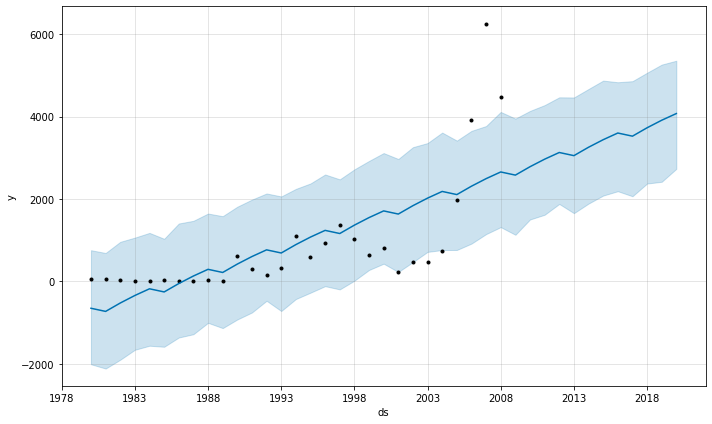

In [265]:
fig3 = prophet.plot(forecast2)

In [266]:
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-01,-1006.827252,-2013.323351,755.800148,-1006.827252,-1006.827252,352.875798,352.875798,352.875798,352.875798,352.875798,352.875798,0.0,0.0,0.0,-653.951454
1,1981-01-01,-888.411297,-2117.738972,687.911993,-888.411297,-888.411297,158.167851,158.167851,158.167851,158.167851,158.167851,158.167851,0.0,0.0,0.0,-730.243446
2,1982-01-01,-770.318884,-1903.486879,958.998675,-770.318884,-770.318884,243.709030,243.709030,243.709030,243.709030,243.709030,243.709030,0.0,0.0,0.0,-526.609854
3,1983-01-01,-652.226471,-1661.794695,1061.498504,-652.226471,-652.226471,308.637964,308.637964,308.637964,308.637964,308.637964,308.637964,0.0,0.0,0.0,-343.588507
4,1984-01-01,-534.134060,-1563.886525,1176.000870,-534.134060,-534.134060,352.875798,352.875798,352.875798,352.875798,352.875798,352.875798,0.0,0.0,0.0,-181.258262


In [267]:
from statsmodels.tools.eval_measures import rmse

In [268]:
test.head()

,ds,y,win,spr,sum,aut,ann_y
29,2009,3133.0,383.4,349.5,425.7,554.2,1678.7
30,2010,4894.0,275.3,236.2,306.6,465.4,1244.2
31,2011,4937.0,362.3,369.9,360.9,569.4,1862.7
32,2012,5483.0,549.5,254.6,386.4,455.6,1596.2
33,2013,4359.0,441.1,285.3,229.6,419.2,1458.0


In [280]:
y_pred = forecast2[-nobs:]['yhat']
y_true = test['y']


In [281]:
y_pred.head()

29    2578.789969
30    2782.432179
31    2965.462144
32    3127.801009
33    3051.517658
Name: yhat, dtype: float64

In [282]:
y_true.head()

29    3133.0
30    4894.0
31    4937.0
32    5483.0
33    4359.0
Name: y, dtype: float64

In [283]:
rmse(y_pred, y_true)

6724.081920757289

In [284]:
from sklearn.metrics import mean_squared_error

In [285]:
mean_squared_error(y_true, y_pred, squared=True)



45213277.67705502

In [286]:
from sklearn.metrics import mean_absolute_percentage_error

In [287]:
mean_absolute_percentage_error(y_true, y_pred)

0.46762097364879857